In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
df = pd.read_csv(r"D:\Notes and Exercises\Machine-Learning\dataset\bbc_text_cls.csv")
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [3]:
df['targets'] = df['labels'].astype("category").cat.codes

In [4]:
# number of classes
K = df['targets'].max() + 1
K

5

In [5]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [6]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [7]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 27790 unique tokens.


In [8]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 2828)


In [9]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 2828)


In [10]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [11]:
# Exercise: try other models
# 1) multiple LSTM layers
# 2) GRU instead of LSTM
# 3) SimpleRNN instead of LSTM
# 4) return_sequences=False, and no maxpool
# 5) For 1-4, try different values of number of hidden units
# 6) Combinations of the above

# Common beginner question:
# "how can I choose the best combination of hyperparameters?"
# This is how! There is no shortcut!

In [12]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=50,
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/50
49/49 [==============================] - 89s 2s/step - loss: 1.6004 - accuracy: 0.2447 - val_loss: 1.5878 - val_accuracy: 0.3683
Epoch 2/50
49/49 [==============================] - 48s 982ms/step - loss: 1.5944 - accuracy: 0.3950 - val_loss: 1.4924 - val_accuracy: 0.4491
Epoch 3/50
49/49 [==============================] - 54s 1s/step - loss: 1.3177 - accuracy: 0.4811 - val_loss: 1.1998 - val_accuracy: 0.4820
Epoch 4/50
49/49 [==============================] - 64s 1s/step - loss: 1.1536 - accuracy: 0.5780 - val_loss: 1.1454 - val_accuracy: 0.5509
Epoch 5/50
49/49 [==============================] - 81s 2s/step - loss: 1.0200 - accuracy: 0.6859 - val_loss: 1.0202 - val_accuracy: 0.6332
Epoch 6/50
49/49 [==============================] - 82s 2s/step - loss: 0.9185 - accuracy: 0.6846 - val_loss: 0.9032 - val_accuracy: 0.6557
Epoch 7/50
49/49 [==============================] - 102s 2s/step - loss: 0.7940 - accuracy: 0.7225 - val_loss: 0.7929 - val_accuracy: 0.705

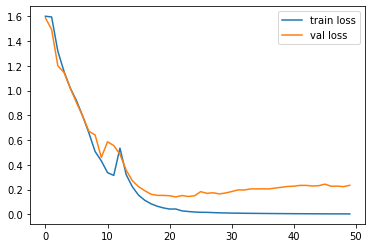

In [13]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

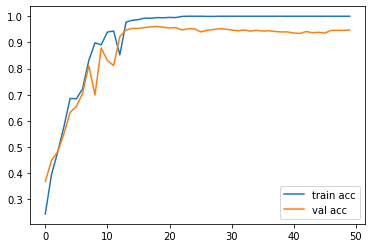

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();